# University of Waterloo Systems Design Engineering Class of 2014 - Co-op Analysis


### Background

For those who don't know, the University of Waterloo is a young university located in Waterloo, Ontario, roughly one hour west of Toronto.

One of the university's outstanding features is the integration of co-op placements (internships) into the core curriculum, with many faculties requiring anywhere from 2-6 co-op terms to be done as part of an undergraduate degree. This experience acclimates students to work in industry, providing valuable context for academic study, as well as preping students for success come graduation.

### Our class

I was part of the Systems Design Engineering class of 2014. Engineering students are required to do at least 5, normally 6 co-op placements within their five year program as a requirement for graduation. 

Academically, Systems Design Engineering provides a broad engineering curriculum and an emphasis on design system modeling, and optimization. The program's stated goal is to provide a background in a breadth of topics to enable graduates to tackle complex, interdisciplinary problems.


### Why look at co-op data?

One of the major selling points of Systems Design Engineering for many incoming students is the reported breath and diversity of the curriculum and resulting career options. I feel this poses as somewhat of a double-edged sword for many incoming students. On one hand, the promise of breadth offers a sense of safety with regards to not getting pidgeon-holed into a career path they may not want. On the other hand, very little is said about where people _actually_ end up once they leave the program.

The goal of the 6 co-op placements is to allow students to explore various career options in hopes of discovering what they want to pursue, and hopefully allow the student to gain some experience in that field before graduation. Therefore, one can think of the 6 internships taken by a student during their program as a exploratory path between the two states of 'I have no idea what I want' and 'I have found a career path I would like to explore'. And so, analysing a number of these paths for patters should provide some insight into what careers _actually_ unfold out of the Systems Design program, and the processes through which those were discovered.

On a more...emotional level, I believe that co-op is so integral to the experience at Waterloo that the coop story of a class is part of the identity of the class itself, and I hope to learn more about that story by this means.

In [1]:
# Our imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The Data Set

Our class kept a spreadsheet of our co-op jobs throughout our time at Waterloo. Each term, A new sheet was created and students would update the datasheet with what they were up to next term: Job Title, Company, Location (City, State, Country).

These sheets were combined, and co-op placements were numbered 1..n.

Missing placements were filled from data found on LinkedIn. Full-time positions were also added when available, and differentiated based on  the column `job_type ['internship, 'full-time']`.

`industry` was pulled from LinkedIn descriptions of the organizations.

There was a lot of varience in `job_title`, so `job_type` was developed from manual categorizaiton of job titles.

In [2]:
df = pd.read_csv('../data/2014 - Master Sheet - Sheet1.csv') # This data set isn't publicly available yet :(
print 'Raw data'
print 'Shape: ' + str(df.shape)
print 'Columns: ' + str(df.columns.values) + '\n'

# A little bit of cleaning:
# First, we remove any student who we don't have at least 6 co-ops for. 
# Note that we record skipped terms in the data set, so there should always be at least 6 for a student, else we're missing data
name_grouped = df.groupby('name').size()
incomplete_student_sets = name_grouped[name_grouped <= 5].index.values
clean = df.drop(df[df['name'].isin(incomplete_student_sets)].index)
print 'Data points after cleaning: ' + str(clean.shape[0])

# Create a convenience sheet containing all work terms
terms = clean[clean['job_type'] == "internship"]
print 'Co-op term data points: ' + str(terms.shape[0])

# Create convenience data frames for internships
coops = terms[terms['worked?'] == "Yes"]
print 'Co-op data points: ' + str(coops.shape[0])

# Create convenience data frames for the full-time jobs
jobs = clean[clean['job_type'] == 'full-time']
print 'Full-time job data points: ' + str(jobs.shape[0]) + '\n'

Raw data
Shape: (525, 12)
Columns: ['name' 'year' 'job_type' 'term_number' 'worked?' 'job_title'
 'type_of_work' 'employer' 'industry' 'city' 'state' 'country']

Data points after cleaning: 514
Co-op term data points: 416
Co-op data points: 400
Full-time job data points: 95



## An overview: 5 years of coops at a glance

Let's first look at some broad statistics about the cumulation of coop terms from the class.

In [3]:
print 'Number of students: ' + str(coops['name'].unique().size)
print 'Number of co-op placements: ' + str(coops.shape[0])
print 'Number of unique employers: ' + str(coops['employer'].unique().size)
print 'Number of unique geographic locations: ' + str(coops[['city','state','country']].drop_duplicates().shape[0])

Number of students: 69
Number of co-op placements: 400
Number of unique employers: 221
Number of unique geographic locations: 58


Collectively, our 69 students gathered 400 co-op terms with 224 unique employers across 66 different places in the world. At 4 months / terms, this represents ~130 years of industry experience. Although this is nothing new or spectacular, given that this is the experience for all engineering classes at Waterloo, I think the numbers help to formalize the value which a coop undergraduate program offers.

One thing that _is_ specific to Systems Design Engineering, as mentioned above, is idea of a broad and flexible education that can take you many places. Let's look at some frequency distributions across job type, industry, and location to see if we can find some patterns.

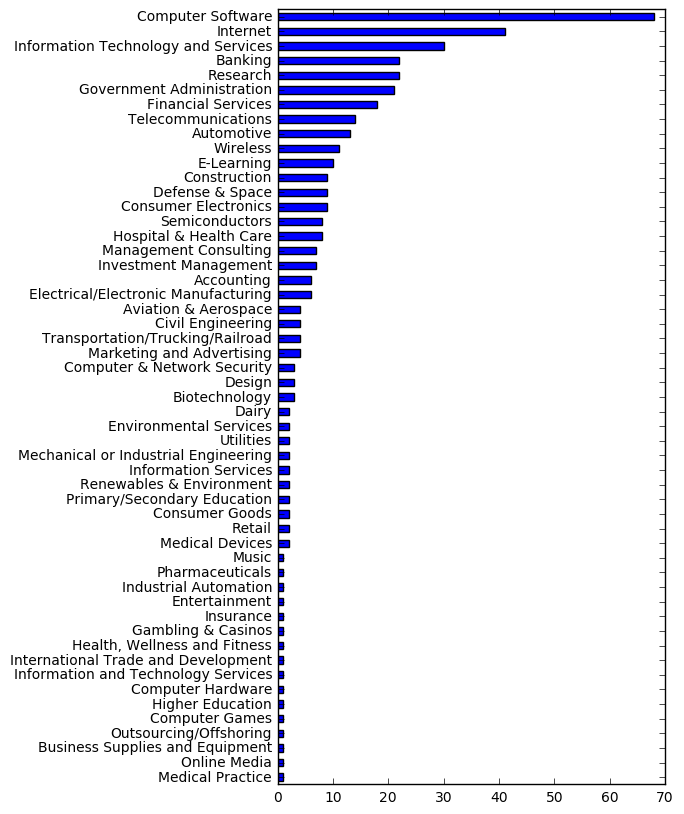

In [4]:
# Let's look at what were the most popular industries
coops['industry'].value_counts().plot(kind='barh', figsize=(5,10)).invert_yaxis()

With `Computer Software`, `Internet`, and `Information Technology and Services` as the three most frequent industries, it's clear that the class had a large emphasis towards computer and software technology.


If you look at the long tail, a diverse set of industries are represented.

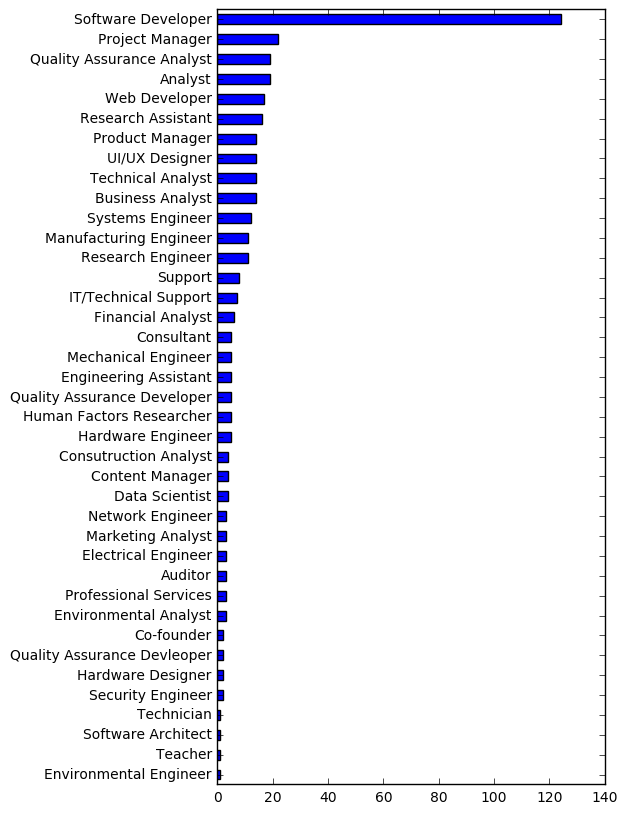

In [5]:
# frequency distribution of the type of work students were doing.
coops['type_of_work'].value_counts().plot(kind='barh', figsize=(5,10)).invert_yaxis()

A large share of coop placements were related to software development. I believe this further emphasises the class' focus, even more so on software. It's clear that software is the main focus of coops for the SYDE class.

The large tail for the distribution suggests that the class did experience a diverse range of types of work.

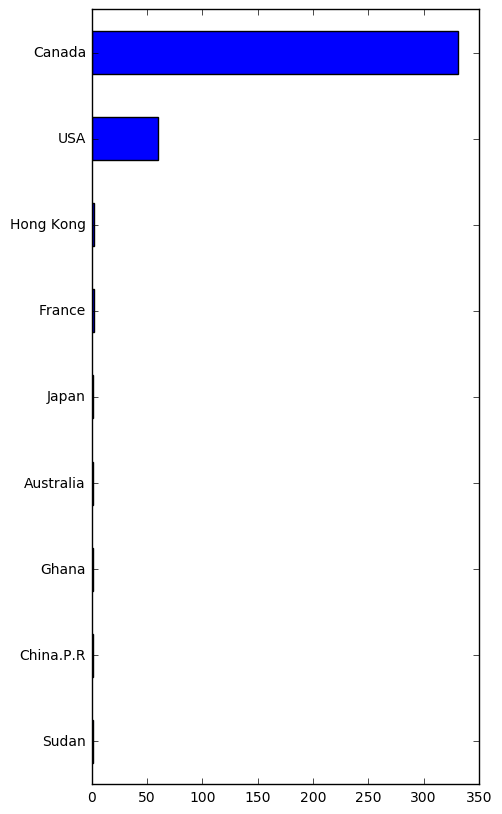

In [6]:
# Show coop placement counts by country
coops['country'].value_counts().plot(kind='barh', figsize=(5,10)).invert_yaxis()

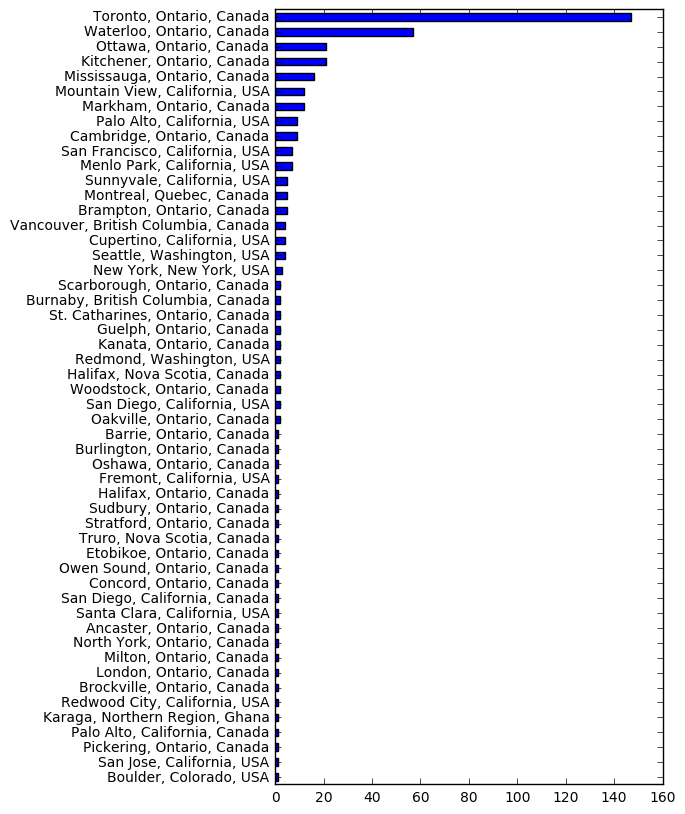

In [7]:
# Show coop placement counts by city.
coops.assign(loc_full = lambda x: x.city + ', ' +  x.state + ', ' + x.country)['loc_full'].value_counts().plot(kind='barh', figsize=(5,10)).invert_yaxis()

## The Personal Journey

In the last section we looked at some aggregate statistics in order to add some color to what Systems Design Engineering as a preparation / introduction to industry. In the next section, I want to see what we can learn about the invidivual student journey by searching for trends across ~70 of them.

- How many coop terms did students actually complete?
- How many unique employers did a student work for?
- How many industries did the average student work for?

Count of students by the number of co-op completed through their 6 terms:


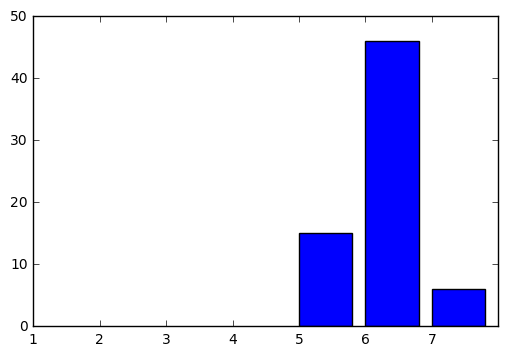

In [8]:
# Show the count of students by the number of co-op placements they did.
print 'Count of students by the number of co-op completed through their 6 terms:'
counts = terms.groupby(['name','worked?']).agg('count')['year'].unstack().fillna(0)['Yes'].value_counts()[[5,6,7]]; counts

# Let's graph that
plt.bar(counts.index, counts.values)
plt.xticks([1,2,3,4,5,6,7])
plt.show()

As mentioned above, the curriculumn assumes 6 co-op placements, however students must only complete 5 to graduate, and can complete as many as they want.

Most students take advantage of the full 6 co-op terms to gain experience.

Who ends up with 7 co-ops? Students who fall back a year will end up with 1 or 2 more internship opportunities, and might take advantage of those extra opportunities.

Some students will also only complete the 5 required co-ops to graduate. Some reasons why someone might opt to do so:
* They drop out of the undergrad program and therefore do  not complete all their co-op
* To travel or spend time on personal projects.
* Family/personal reasons

### How many different companies did students work for?

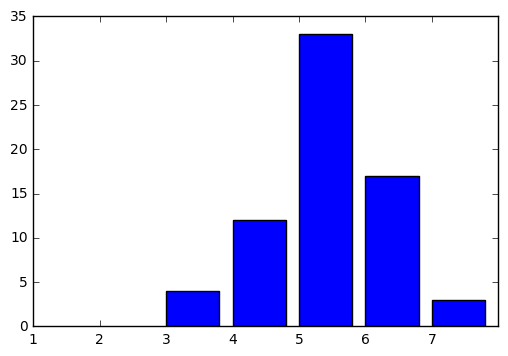

In [9]:
# Show a distribution of number of unique employers each student worked for
employer_counts = coops.groupby('name')['employer'].unique().map( lambda x: str(x.size) ).value_counts().sort_index()
plt.bar(employer_counts.index.values, employer_counts.values)
plt.xticks([1,2,3,4,5,6,7])
plt.show()

### How many different industries did students work in?

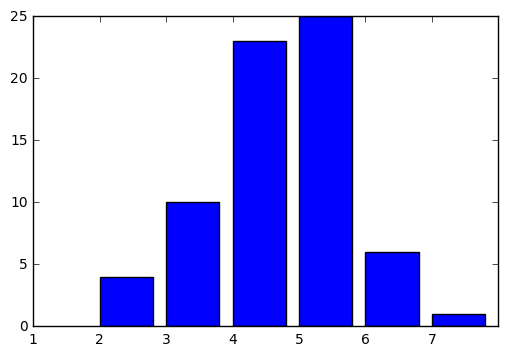

In [41]:
# Show a distribution of number of unique industries each student worked in
industry_counts = coops.groupby('name')['industry'].unique().map( lambda x: str(x.size) ).value_counts().sort_index()
plt.bar(industry_counts.index.values, industry_counts.values)
plt.xticks([1,2,3,4,5,6,7])
plt.show()

### How many different types of work did people do?

<Container object of 6 artists>

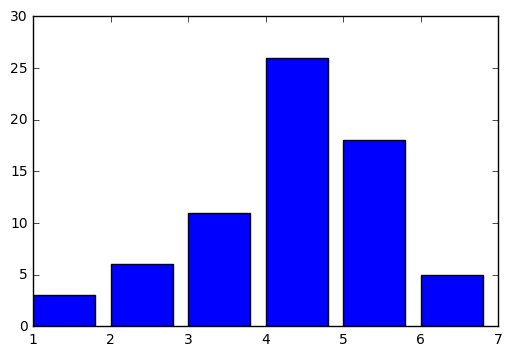

In [11]:
# Show a distribution of number of unique job types each student held
work_type_counts = coops.groupby('name')['type_of_work'].unique().map( lambda x: str(x.size) ).value_counts().sort_index()
plt.bar(work_type_counts.index.values, work_type_counts.values)

I'm surprised by the number of students who did 3 or less types of work. It would be interesting to see if those students were concentrated in any particular industry.

# Returns & Retention

The coop program is a unique opportunity for students to gain real-world experience while figuring out what kinds of work interest them to pursue long-term. 

For employers, it's an opportunity to work with young fresh minds who might one day make great full-time employees.

Let's look at some return data. How many students go back to an employer for a second internship? How many students return to an employer full-time?

### How many people returned to an employer?

In [44]:
# Calculate the percentage of students who returned to an employer for two adjacent coop terms
coops = coops.assign(adjacent_return = False)
for index, row in coops.iterrows():
    if not coops[(coops['name'] == row['name']) & (coops['employer'] == row['employer']) & (coops['term_number'] == (row['term_number'] - 1))].empty:
        coops.loc[index,'adjacent_return'] = True

float(df[df['adjacent_return'] == True].shape[0]) / float(df.shape[0])*100

8.952380952380953

~9% of all internships in the data set are returns to the employer who employed the student in the previous term.

In [46]:
# Calculate the percentage of students who returned to an employer for two coop terms
coops = coops.assign(any_return = False)
for index, row in coops.iterrows():
    if not coops[(coops['name'] == row['name']) & (coops['employer'] == row['employer']) & (coops['term_number'] < (row['term_number']))].empty:
        coops.loc[index,'any_return'] = True

float(df[df['any_return'] == True].shape[0]) / float(df.shape[0])*100

9.904761904761905

If we remove the constraint of adjacency, the percentage increases only by 1%. So it seems that if a student is going to return, it's most likely that they're going to return for the next term.

In [47]:
# List out the employers who had at least one return by descending count
coops[coops['any_return'] == True]['employer'].value_counts()

NexJ Systems Inc.                 4
University of Waterloo            3
CIBC                              2
PCL Constructors                  2
Broadcom                          2
Microsoft Corporation             2
Desire2Learn Inc.                 2
Scotiabank                        2
Atlas Tire Wholesale              1
Use-IT Lab, U of Waterloo         1
Blackberry                        1
BelAir Networks                   1
Bell Canada                       1
Halsall                           1
AGFA Healthcare                   1
LinkedIn                          1
Toyota                            1
Rogers Communications             1
Research In Motion                1
eHealth Ontario                   1
Square, Inc.                      1
Audatex Canada                    1
Canadian Space Agency             1
Spartan Bioscience                1
CGI Group Inc.                    1
Careerify                         1
Rich Media                        1
Willow Garage               

Not sure what this list says, just thought it would be interesting to look at.

In [64]:
# Count the number of students who took a full-time position at a company where they interned
df = df.assign(full_time_return = False)
for index, row in df.iterrows():
    if (row['job_type'] == 'full-time') and not df[(df['name'] == row['name']) & (df['job_type'] == 'internship') & (df['employer'] == row['employer'])].empty:
        df.loc[index, 'full_time_return'] = True

successes = df[df['full_time_return'] == True].shape[0]; print "students who took FTE at a company where they interned: " + str(successes)
total_ft = jobs.shape[0]; print 'full-time positions in the data set: ' + str(total_ft)

print "\nOr, " + str(float(successes)/float(total_ft)*100) + "%"

students who took FTE at a company where they interned: 21
full-time positions in the data set: 95

Or, 22.1052631579%


So it looks like not many students end up working at the companies where they interned, come full-time employment. Most students use the internships as stepping stones.

In [18]:
# List the companies which had students come-back full-time after interning.
df[df['full_time_return'] == True]['employer'].value_counts()

Facebook                    4
CGI Group Inc.              2
PCL Constructors            1
Toyota                      1
Christie Digital Systems    1
Halsall                     1
VMware                      1
Rogers Communications       1
Thalmic Labs                1
General Dynamics Canada     1
LinkedIn                    1
Earthmind                   1
NVIDIA                      1
McKinsey & Co.              1
E la Carte                  1
Tesla Motors                1
Spartan Bioscience          1
Name: employer, dtype: int64

In [66]:
float(df[df['full_time_return'] == True]['employer'].value_counts().shape[0]) / (df[df['job_type'] == 'internship'].shape[0])*100

3.9906103286384975

If you look at it the other way araound, of all the organizations who had at least one co-op student from our class, only about 4% of them had that student return for full-time employment. If, as an employer, you believe the value of having co-ops is the potential of having them return full-time, a 4% success rate doesn't seem that great.

## The States

Let's talk about the states!

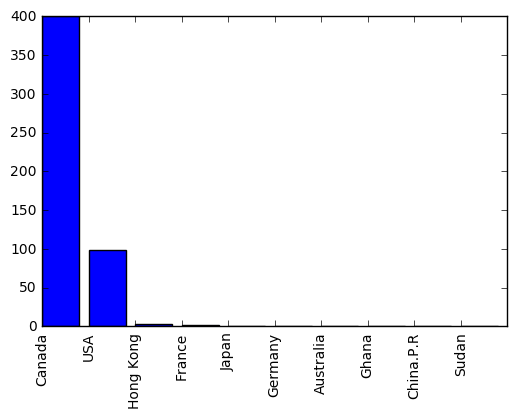

In [67]:
# As a refresher, plot coop country counts
plt.bar(np.arange(len(df['country'].value_counts().values)), df['country'].value_counts().values)
plt.xticks(np.arange(len(df['country'].value_counts().values)), df['country'].value_counts().index.values, rotation = 'vertical')
plt.show()

<Container object of 5 artists>

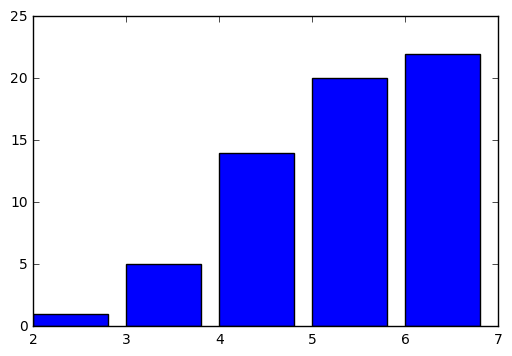

In [73]:
# Plot the number of internships in the states by co-op term number
us_terms = pd.DataFrame(df[(df['country'] == 'USA') & (df['term_number'] <= 6)].groupby('term_number').size().rename('count'))
plt.bar(us_terms.index, us_terms['count'])

The number of US-based internships increases with term number from 0 in the first term to just over 20 in the sixth term. As students gain experience, it becomes easier to compete for internship positions in the states, which likely explains this increase over time.

Note that I've excluded 7th term internships, as there were very few of them.

### How many people to back to Canada?

In [74]:
# Show some stats about students who return to canada for an internship after interning state-side
canada_returns = coops.assign(returned = False)
for index, row in canada_returns.iterrows():
    if (row['country'] == 'Canada') and not canada_returns[(canada_returns['name'] == row['name']) & (canada_returns['country'] == 'USA') & (canada_returns['term_number'] < row['term_number'])].empty:
        canada_returns.loc[index,'returned'] = True

num_us = np.unique(canada_returns[canada_returns['country'] == 'USA']['name']).size
num_returned = canada_returns[canada_returns['returned'] == True].shape[0]

print 'number of students who did at least 1 internship in the States: ' + str(num_us)
print 'number of students who returned to a cdn internship after one in the states: ' + str(num_returned)
print ''
print 'Or, ' + str(int(float(num_returned) / float(num_us) * 100)) + '% of students who did a term in the states ended up returning to an internship in Canada.'

number of students who did at least 1 internship in the States: 30
number of students who returned to a cdn internship after one in the states: 8

Or, 26% of students who did a term in the states ended up returning to an internship in Canada.


In [75]:
# Show some stats about students who return to canada ful-time after interning state-side
canada_returns_ft = jobs.assign(returned = False)
for index, row in canada_returns_ft.iterrows():
    if (row['country'] == 'Canada') and not coops[(coops['name'] == row['name']) & (coops['country'] == 'USA')].empty:
        canada_returns_ft.loc[index,'returned'] = True

num_returned_ft = np.unique(canada_returns_ft[canada_returns_ft['returned'] == True]['name']).size

print 'number of students who returned for for full-time work in Canada after at least 1 internship in the States: ' + str(num_returned_ft)
print ''

print str(float(num_returned_ft) / float(num_us) * 100) + '% of students who did an internship in the states returned to Canada for full-time employment.'

number of students who returned for for full-time work in Canada after at least 1 internship in the States: 10

33.3333333333% of students who did an internship in the states returned to Canada for full-time employment.


I think this is a pretty important stat. Basically, if a student makes it out to the states for an internship, there's a >70% chance they will not return to Canada for full-time employment. I think this is an interesting little peek into brain drain in action.

# Concluding Notes

Well, that's it for this primary analysis. For those of you familiar with the program, I hope this data shed a little light on the intuitions and premonitions we've developed. For those of you who know nothing about the program, I hope this has been an interesting look into how internships can be leveraged when attending an undergrad program such as the University of Waterloo's.

If you have any questions, feel free to email me at myles.ym.tan@gmail.com

# Rough work

This is to be removed before publishing, If you're reading this as a draft, a) you rock and b) ignore this section.

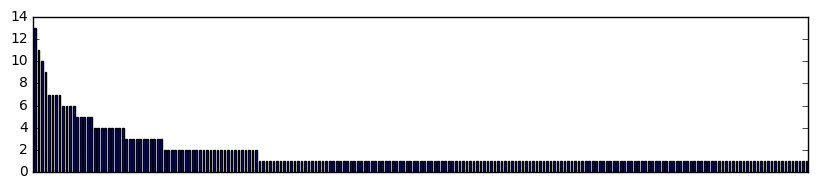

In [24]:
# ## What Companies did students work for?

# uWaterloo [states that](https://uwaterloo.ca/hire/why-hire-waterloo-students-and-alumni) there are '...more than 6300 organizations worldwide' which employ students on co-op terms.

# As stated above, our class accumulated 224 unique companies through their coops. Although a single student is limited in the number of companies they can work for by the number of coops they take, the collective experience of the class allows a students to inquire and learn through hearing first-hand accounts of the experiences of classmates. The class' diversity is an assets which all students can gain from.

# Let's dig a bit more into the employers of this class to see if we can find anything interesting.

# We'll start with the frequency distribution:


coops['employer'].value_counts().plot(kind='bar', figsize=(10,2)).axes.get_xaxis().set_visible(False)

A majority of employers who employed at least one student from the class only had that single coop with the class. There appear to be a few employers who had a suprisingly large number of coops from the class.

Let's first take a look at the high-count employers.

In [25]:
# let's look at the list of most popular employers for our class:
n_list = coops['employer'].value_counts()

print 'Employers by number of co-op terms completed by students:'
y = n_list[n_list >= 5]; print y

Employers by number of co-op terms completed by students:
NexJ Systems Inc.         13
Research In Motion        11
University of Waterloo    10
Facebook                   9
Scotiabank                 7
TD                         7
Desire2Learn Inc.          7
Environment Canada         7
PWC                        6
CIBC                       6
Toyota                     6
Blackberry                 6
CGI Group Inc.             5
Rogers Communications      5
Manulife Financial         5
Open Text Corporation      5
Deloitte                   5
Name: employer, dtype: int64


NexJ Systems, the leader, is a Toronto-based CRM company, founded by a Systems Design Engineering grad, and one of the largest promoters of the coop program (The University of Waterloo's career center building and Systems Design Engineering hallway both bear the CEO's name). 

Research in Motion (Blackberry) is another strong promoter of the program.

The University itself happens to be one of the largest employers of coop students, and this class present that.

There doesn't seem to be any real clustering of returns to a few key organizations (note: NexJ was basically me), so it would be hard to say that there were 1 or 2 companies that really showed their ability to retain co-op students, at least in the context of our class.

Above, we can see the number of different employers students worked for through their term. The least was 

# What industries did people work in?

As a reminder, the industry information was pulled off of LinkedIn based on the employer. For employers that didn't have employer data, I left it empty. The linkedin industries might not be the...best breakdown, but I think it's a good starting point.

### What industries were most popular?

In [26]:
df[df['job_type'] == 'internship']['industry'].value_counts()

Computer Software                       70
Internet                                41
Information Technology and Services     32
Government Administration               23
Research                                23
Banking                                 22
Financial Services                      18
Telecommunications                      14
Automotive                              13
Wireless                                11
E-Learning                              10
Construction                             9
Defense & Space                          9
Consumer Electronics                     9
Semiconductors                           9
Hospital & Health Care                   8
Investment Management                    7
Management Consulting                    7
Accounting                               6
Electrical/Electronic Manufacturing      6
Aviation & Aerospace                     4
Civil Engineering                        4
Marketing and Advertising                4
Transportat

Above you can see the industries where co-ops were done, descending by frequency of occurrence. Information Technology definitely is the predominant space, with the top three most frequent industries being related.

Workin in the financial sector is also quite popular, with the number 4 and number 6 most frequent industries being related.

You could look at this distribution and say that despite SYDE's strong association with diversity in terms of areas of work, there seems to be a very strong emphasis on technology and finance.

### How many different industries did SYDE students do co-ops in?

In [27]:
df['industry'].unique().shape[0]

61

Apparently, 54 unique industries as categorized by the companies' LinkedIn Industry Description.

In [28]:
li_industries = pd.read_csv('../data/2014 - Master Sheet - Sheet2.csv') # I've pulled the full list of Linkedin industries
float(df['industry'].unique().shape[0]) / (li_industries['description'].shape[0])

0.41496598639455784

This class combined has done at least one internship in 37% of all Linkedin industry groups. Intuitively, that seems like pretty good coverage for one class over 5 years. However, as stated above, the distribution for this class was quite focused on a few core industries, e.g. tech, finance.

I think it's important to note here that industry is somewhat independent from the kind of work which the co-op was doing, usually more so than people would think/imagine. the actual kind of work is better captured by `job_title`, which hopefully we'll explore later. I think this is important to note because it would be pretty easy to say 'oh someone did a job in construction' and assume that person was doing the kind of work that one strongly associates with the word 'construction', and I feel like this is (likely) not the case.

Note: With a larger data set, it would be interesting to compare the spread and distribution between engineerin disciplines.

### Were there any changes in industry over time?

In [29]:
# To keep things cleaner let's look at all industries w/ 5 or more co-ops
major_industries = df['industry'].value_counts()[df['industry'].value_counts() > 10].index.values
major_industries

array(['Computer Software', 'Internet',
       'Information Technology and Services', 'Research', 'Banking',
       'Government Administration', 'Financial Services', 'Automotive',
       'Telecommunications', 'Consumer Electronics', 'E-Learning',
       'Construction', 'Wireless'], dtype=object)

In [30]:
major_industry_coops = df[df['industry'].isin(major_industries)]

In [31]:
counts = pd.DataFrame(major_industry_coops.groupby(['industry', 'term_number']).size().rename('counts'))
type(counts)

pandas.core.frame.DataFrame

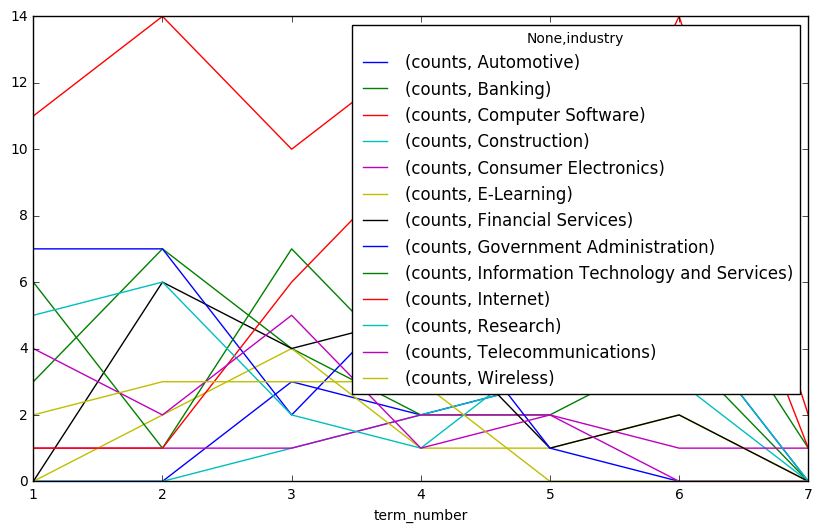

In [32]:
counts.unstack(level=0).fillna(0.0).plot(figsize=(10,6))

...

# Co-op Location

### Where did people work?

In [33]:
df['country'].value_counts()

Canada       400
USA           99
Hong Kong      3
France         2
Japan          1
Germany        1
Australia      1
Ghana          1
China.P.R      1
Sudan          1
Name: country, dtype: int64

A majority of the placements were in Canada, with a significant amount in the US, and a few people who went elsewhere.

In [34]:
# Find the people for whom I don't have enough co-op data 
name_grouped = coops.groupby('name').size()
incomplete = name_grouped[name_grouped <= 5].index.values
clean = df.drop(df[df['name'].isin(incomplete)].index)

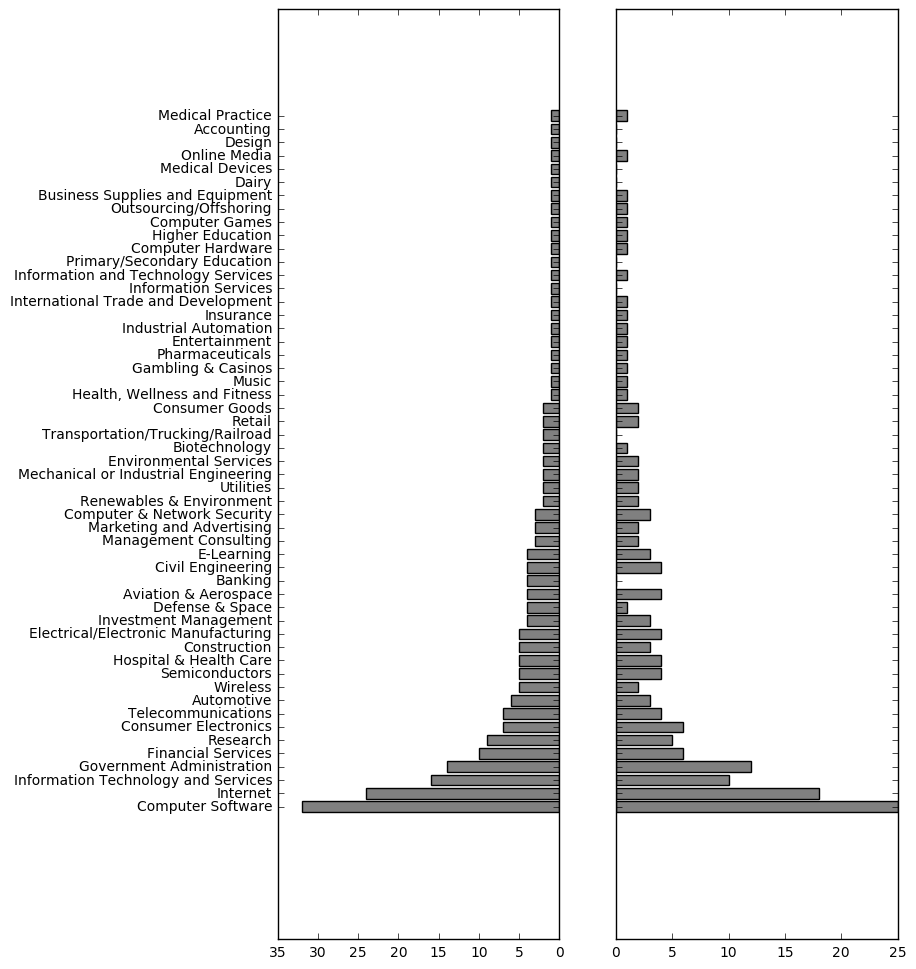

In [35]:
# For employers who only took one student, was there a particular industry to which this was skewed?

# let's look at the list of most popular employers for our class:
n_list = coops['employer'].value_counts()
y = n_list[n_list == 1]

# let's get a count by industry for employers w/ only one co-op
industries = coops[['employer','industry']].drop_duplicates()
single_industries = industries[industries['employer'].isin(y.index.values)]['industry'].value_counts()
# single_industries.plot(kind="bar")

# now let's get the counts for all internships
all_industries = industries['industry'].value_counts()
# all_industries.plot(kind="bar")

# Let's plot them side by side to see if there's any large differences...
y = np.arange(all_industries.index.values.size)
x1 = all_industries.values
x2 = single_industries.reindex(all_industries.index.values, fill_value=0)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(8,12))
axes[0].barh(y, x1, align='center', color='gray')
axes[1].barh(y, x2, align='center', color='gray')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=all_industries.index.values)

plt.show()

# They look pretty similar, I don't think there is anything noteworthy here.

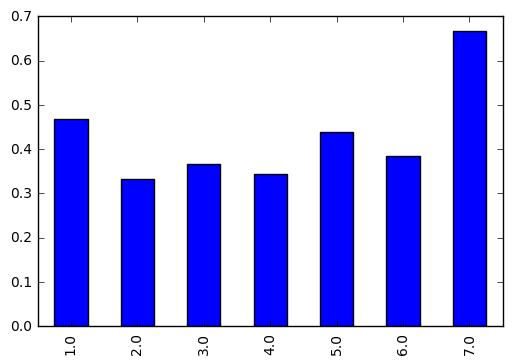

In [36]:
# For employers who only took one co-op student, is there a skew towardsa co-op term (e.g. those happen earlier or later in a student's career)?

# Lets get the counts per term
# let's look at the list of most popular employers for our class:
n_list = coops['employer'].value_counts()
y = n_list[n_list == 1]

# Let's get the total counts so we can normalize by the number of values
x = coops['term_number'].value_counts().reindex([ 1.,  2.,  3.,  4.,  5.,  6.,  7.])

coops[coops['employer'].isin(y.index.values)]['term_number'].value_counts().reindex([ 1.,  2.,  3.,  4.,  5.,  6.,  7.]).divide(x).plot(kind='bar')

# The 7th coop seems to be quite higher, but there are also only 6 values, so I don't think it's a trend worth bringing up.

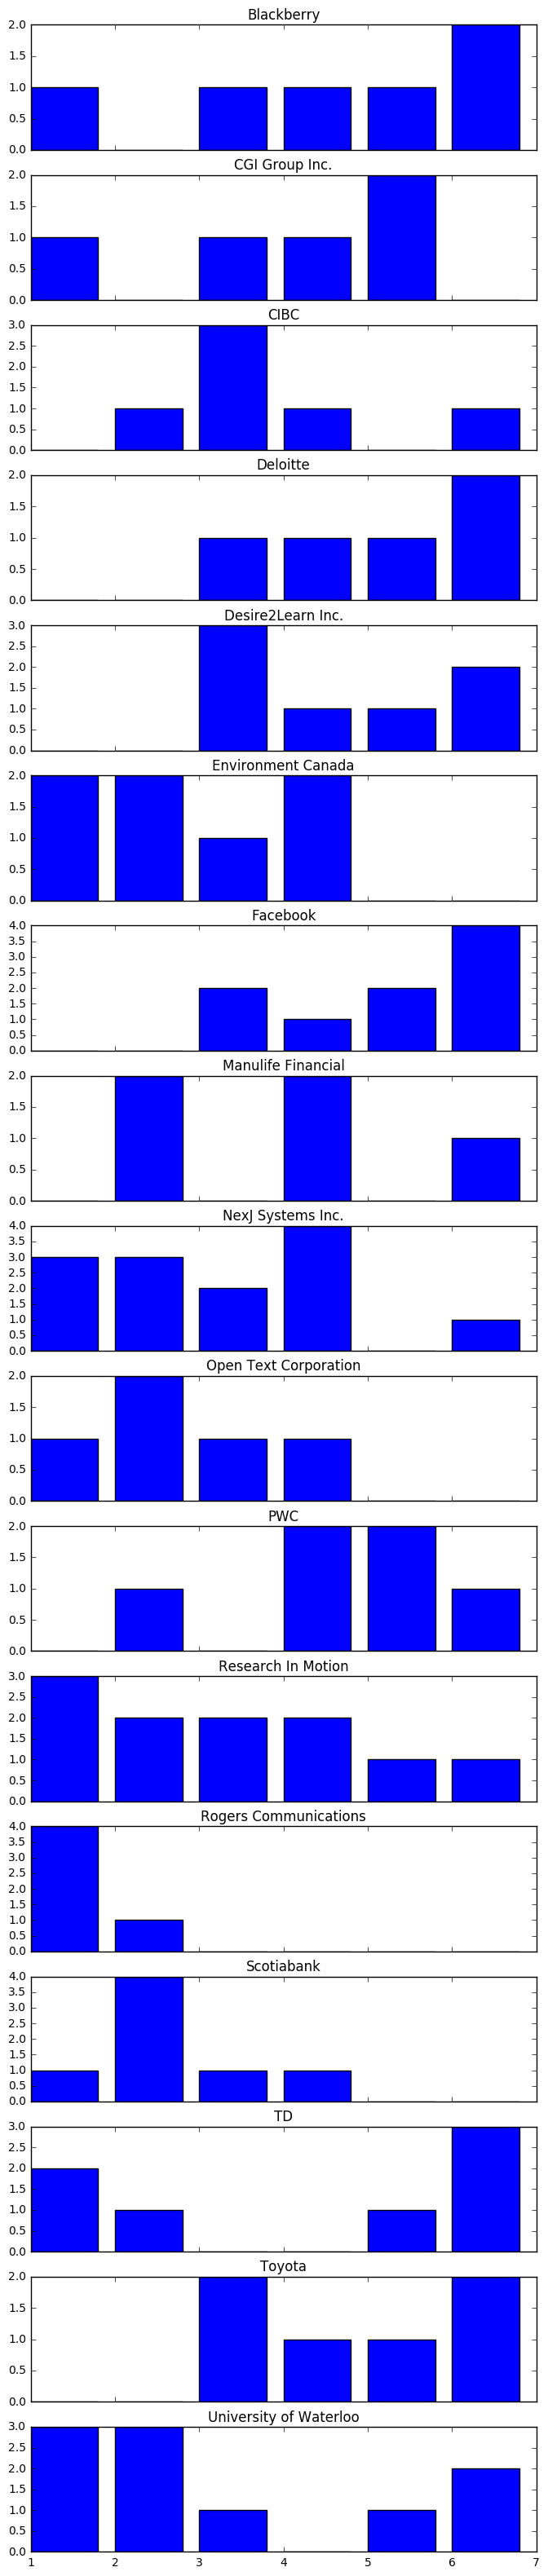

In [37]:
# For the companies that were particularly popular for this class, was there a particular distribution by term?

# let's look at the list of most popular employers for our class:
n_list = coops['employer'].value_counts()
y = n_list[n_list >= 5]

popular_cts_by_term = coops[coops['employer'].isin(y.index.values)].groupby(['employer','term_number']).size().rename('counts')

fig, axes = plt.subplots(nrows=y.count(), sharex=True, figsize=(8,40))
for x in np.arange(y.count()):
    axes[x].set_title(sorted(y.index.values)[x])
    axes[x].bar([1.0,2.0,3.0,4.0,5.0,6.0], popular_cts_by_term.unstack(level=1).fillna(0).ix[x].values)

In [38]:
li_industries = pd.read_csv('../data/2014 - Master Sheet - Sheet2.csv') # I've pulled the full list of Linkedin industries
sheet_industries = coops['industry'].drop_duplicates()
sheet_industries[sheet_industries.isin(li_industries['description']) == False]


221    Information and Technology Services
Name: industry, dtype: object

In [39]:
coops['city'].unique()

array(['Kitchener', 'Palo Alto', 'San Jose', 'Guelph', 'Mississauga',
       'Pickering', 'Waterloo', 'Cambridge', 'Ottawa', 'Toronto',
       'Menlo Park', 'New York', 'St. Catharines', 'Kanata', 'Burlington',
       'Milton', 'San Francisco', 'Seattle', 'Brampton', 'Markham',
       'Scarborough', 'Vancouver', 'London', 'Mountain View', 'Montreal',
       'Sunnyvale', 'Toulouse', 'Beijing', 'San Diego', 'Cupertino',
       'Halifax', 'Barrie', 'Etobikoe', 'Oshawa', 'Woodstock', 'Hong Kong',
       'Brockville', 'Karaga', 'Sudbury', 'Santa Clara', 'Stratford',
       'Tokyo', 'Burnaby', 'North York', 'Ancaster', 'Khartoum',
       'Owen Sound', 'Oakville', 'Concord', 'Redwood City', 'Fremont',
       'Truro', 'Redmond', nan, 'Boulder'], dtype=object)

In [40]:
# how many students do we have full-time positions for?
print set(coops['name'].unique().tolist())
print set(jobs['name'].unique().tolist())


set(coops['name'].unique().tolist()) - set(jobs['name'].unique().tolist())
# coops['name'].unique().delete(jobs['name'].unique())

set(['Sebastian Hernandez', 'Charles Desouza', 'Sisun Lee', 'Aftad Zaman', 'Sarah Elliott', 'Stephanie Cheng', 'Richard Lesco', 'Ashutosh Syal', 'Ram Sharma', 'Aisha Sial', 'Edward Li', 'Gary Lam', 'Nahiyan Malik', 'Andy Lee', 'Hans Vermeulen', 'Ruchir Doshi', 'Eric Kyungwoo Sung', 'Daxal Desai', 'Michelle Pugne', 'Anna Mach', 'Hans Kao', 'Hojoon Lee', 'Nachiket Yardi', 'Myles Tan', 'Justin Lau', 'Owen Coutts', 'Jan Kulinski', 'Sheldon Fernandes', 'Tom Sun', 'Karina Sils', 'Sara Greenberg', 'Chi Wai Kenneth Ng', 'Jessica Wang', 'Faizan Haque', 'Grace Ku', 'George Cao', 'Chris Vandevelde', 'Henry Poon', 'Sharon Leung', 'Rayomand Patel', 'Vithuran Balasubramaniam', 'Pratik Konnur', 'Zhang-Yao Cheng', 'Xunzhi Sun', 'Ziyad Mir', 'Vithu Jeya', 'Adam Thagard', 'Teddy Antony', 'Cat Mercer', 'Matt Chong', 'Kevin Zhang', 'Senduran Indrakumar', 'Audrey Chung', 'Alex Huras', 'Mark Wai', 'Brian Sinclair', 'Matt Ng', 'Veronica Vermeulen', 'Herman Won', 'Kai Umezawa', 'Scott Neil', 'Chris Menezes', 

{'Audrey Chung',
 'Hans Vermeulen',
 'Michelle Pugne',
 'Sarah Elliott',
 'Tom Sun'}